In [1]:
#Import packages here

import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator  #ImageDataGenerator is a built-in keras function to load data
from tensorflow.keras.models import Sequential                       #Sequential groups a linear stack of layers into a keras.Model
# from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import backend as K

from tensorflow.keras.applications.vgg16 import VGG16
# example of using the vgg16 model as a feature extraction model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D

In [2]:

# #Mount your google drive
#from google.colab import drive
#drive.mount('/content/drive/')

# #spcifying the working directory
#%cd '/content/drive/MyDrive/Colab Notebooks'

In [3]:
###################################################
# Loading the training and testing data
##################################################

# Define the dimensions of our input. We will load the data with a much smaller dimension to reduce computation.
img_width, img_height = 224, 224

#Directory of the dataset
train_data_dir = 'Data/NNdata/train'
validation_data_dir = 'Data/NNdata/test'

#number of samples
nb_train_samples = 960         #number of images inside train directory
nb_validation_samples = 240    #number of images inside test directory
epochs = 5
batch_size = 32 # training sample number per batch

#Prepare the training data using the built-in function ImageDataGenerator()
train_datagen = ImageDataGenerator(
    rescale=1. / 255,               #normalizing the pixel values to 0~1
    shear_range=0.2,                #(optional) data augmentation by shearing the input image
    zoom_range=0.2,                 #(optional) data augmentation by zooming in the input image
    horizontal_flip=True)           #(optional) data augmentation by horizontal flipping the image

#Prepare the test data using the built-in function ImageDataGenerator()
test_datagen = ImageDataGenerator(rescale=1. / 255)  #normalizing the pixel values to 0~1


# To load the data we are going to use built-in keras funciont flow_from_directory()
# it takes the path to a directory & generates batches of augmented data as we defined previously.
# from keras.preprocessing.image import ImageDataGenerator

# train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
train_generator = train_datagen.flow_from_directory(  #loading training data
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(  #loading test data
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')


Found 960 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [4]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [5]:
# Transfer learning


base_model = VGG16(weights='imagenet',include_top=False, input_shape=input_shape) # use weights pre-trained on imagenet
model = base_model.output
model = Flatten()(model)
dense1 = Dense(512,activation='relu')(model)
dense2 = Dense(512,activation='relu')(dense1)
dense3 = Dense(2,activation='softmax')(dense2)

model = Model(inputs=base_model.input, outputs=dense3)

print(model.summary())



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,823,938 (106.14 MB)

 Trainable params: 27,823,938 (106.14 MB)

 Non-trainable params: 0 (0.00 B)

None


In [6]:
for layer in model.layers[:-3]:
  layer.trainable=False
for layer in model.layers[-3:]:
  layer.trainable= True

In [7]:
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,823,938 (106.14 MB)

 Trainable params: 13,109,250 (50.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [8]:
###############################################
# Configure the model for training.
###############################################
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [9]:
#we want to save the best weights in our disk
# we will save the weights when loss on test dataset is minimum
checkpoint = tf.keras.callbacks.ModelCheckpoint('model_best_weights.weights.h5', monitor='val_loss', save_weights_only=True, save_best_only=True, mode='min')

In [10]:
################################################
# Optimize/Train Network
################################################

# To train the network we will use keras built-in function fit_generator()
# which fits the model on data yielded batch-by-batch by a ImageDataGenerator
import time
start_time = time.time()
history= model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    verbose=1,    # This is just for the visualization of training progress.
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size, callbacks=checkpoint)


end_time = time.time()
print('-------------------------------')
print("Time taken: %s seconds " % (end_time - start_time))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6248 - loss: 2.1703

/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.6299 - loss: 2.1340 - val_accuracy: 0.9688 - val_loss: 0.0954
Epoch 2/5


2024-11-18 14:54:34.432734: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9375 - val_loss: 0.2118
Epoch 3/5


2024-11-18 14:54:35.195755: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.9801 - loss: 0.0495 - val_accuracy: 0.9911 - val_loss: 0.0362
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0187
Epoch 5/5


2024-11-18 14:55:32.779313: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


30/30 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.9966 - loss: 0.0177 - val_accuracy: 0.9866 - val_loss: 0.0417
-------------------------------
Time taken: 174.44191527366638 seconds 


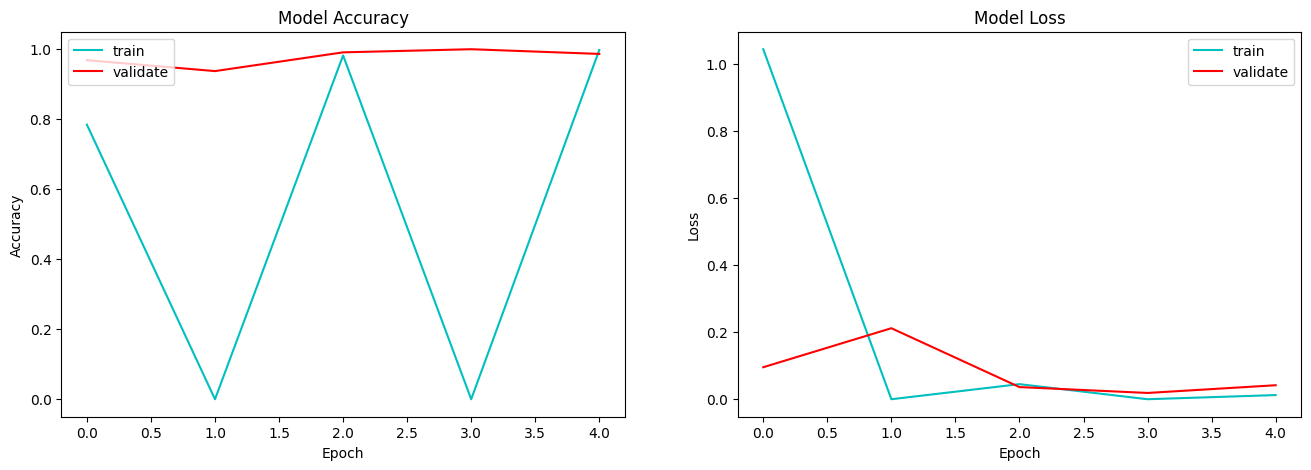

In [11]:
################################################
# Plotting the training history
################################################

#defining a function to show two charts side by side
def plot_training(history):
    fig, axs = plt.subplots(1,2,figsize=(16,5))
    axs[0].plot(history.history['accuracy'], 'c')
    axs[0].plot(history.history['val_accuracy'], 'r')
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')

    axs[1].plot(history.history['loss'], 'c')
    axs[1].plot(history.history['val_loss'], 'r')
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper right')
    plt.show()

#calling the function to show the charts
plot_training(history)

In [12]:
# we saved the best weight out of all training epoch
# Now we are loading the best weight from our disk
model.load_weights('model_best_weights.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


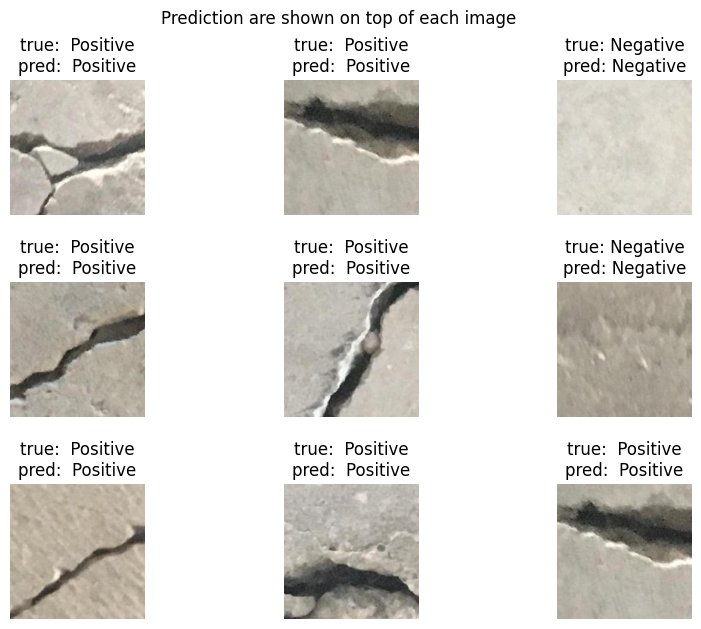

In [14]:

##################################################
# Examining some sample prediction
#################################################
class_list = ['Negative',' Positive']

#taking a batch from the validation dataset
# x is whole batch of the input image
# y is the corresponding label for all the images of that batch
x,y = next(validation_generator) # with the next function we take next batch. Every time we run this block of code it will take the next batch from the previous run

#predict the batch
prediction = model.predict(x)   #this will give the probability of both classes
predicted_classes = np.argmax(prediction,axis=1) # argmax operation returns the indices for the maximum probability.


# We want to show 9 random images from the predicted batch
# we create 9 random index for visualizing images of those indexes
random_index = []
for i in range(9):
    ran = random.randint(1,32)
    random_index.append(ran)

#plotting the images
fig = plt.figure(figsize=(10, 7))
fig.suptitle('Prediction are shown on top of each image')
for k,i in enumerate(random_index):
    fig.add_subplot(3, 3, k+1)
    plt.imshow(x[i])
    plt.axis('off')
    pred = predicted_classes[i]
    index = tf.argmax(y[i], axis=0)

    if pred ==0:
        pred = class_list[0]
    elif pred ==1:
        pred = class_list[1]
    else:
        pred = class_list[2]
    plt.title(f'true: {class_list[index]}\n' \
             f'pred: {pred}')
fig.subplots_adjust(hspace= 0.5)

plt.show()